In [1]:
import csv
import pandas as pd
from biopsykit.protocols import Stroop
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
stroop = Stroop()

In [3]:
folder = 'D:/Victoria/09- Studium/Master/DiPsyLab/social evaluated Stroop-Test - inkongruent/data/test/'
dict_stroop = stroop.load_stroop_test_data(folder=folder)

In [4]:
df_stroop = stroop.get_stroop_dataframe(data=dict_stroop)
df_stroop

Subjects:   0%|          | 0/2 [00:00<?, ?it/s]

c:\users\vmueller\biopsykit\biopsykit\protocols\stroop.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['subject'] = subject_id


propcorrect       meanRT
subject phase                            
VP13    Stroop1     0.871795  1036.058824
        Stroop2     1.000000   794.948718
        Stroop3     0.948718   630.675676
VP21    Stroop1     0.897436   525.342857
        Stroop2     0.820513   513.312500
        Stroop3     0.794872   490.741935

,phase,propcorrect_mean,meanRT_mean,propcorrect_std,meanRT_std
0,Stroop1,88.461538,780.700840,1.813094,361.130723
1,Stroop2,91.025641,654.130609,12.691660,199.146880
2,Stroop3,87.179487,560.708806,10.878566,98.948097


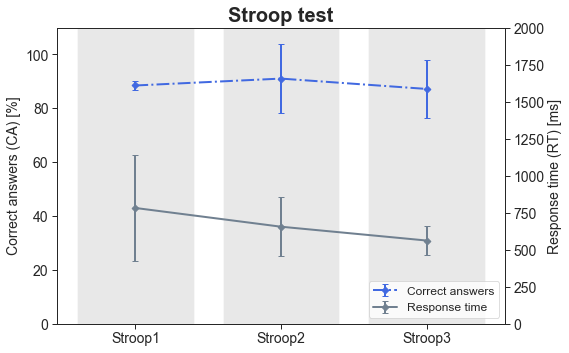

In [5]:
df_stroop_mean = stroop.plot_stroop_mean(data=df_stroop)
df_stroop_mean

In [7]:
df_stroop_mean = stroop.plot_stroop_mean(data=dict_stroop)

Subjects:   0%|          | 0/2 [00:00<?, ?it/s]

c:\users\vmueller\biopsykit\biopsykit\protocols\stroop.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['subject'] = subject_id


In [8]:
df_stroop_mean

,phase,propcorrect_mean,meanRT_mean,propcorrect_std,meanRT_std
0,Stroop1,88.461538,780.700840,1.813094,361.130723
1,Stroop2,91.025641,654.130609,12.691660,199.146880
2,Stroop3,87.179487,560.708806,10.878566,98.948097
